In [1]:
import math
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from simple import nmf_son
from sklearn.decomposition import NMF
from mpl_toolkits.axes_grid1 import make_axes_locatable


np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def normalized_similarity(W_ins):
    r = W_ins.shape[1]
    res = np.ones(shape=(r, r)) * -1
    for i in range(r):
        for j in range(r):
            res[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
        res[i, :] = res[i, :] / sum(res[i, :])
    return res

def plot_scores(fscores, gscores, lambda_vals):
    def plot_ax(ax, f, g, total):
        ax.plot(total, color='black', linewidth=3, label='total')
        ax.plot(f, label='f')
        ax.plot(g, label='g')
        ax.legend()

    total_score = fscores + lambda_vals * gscores
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    plot_ax(axs[0], fscores, gscores, total_score)

    axs[1].set_yscale('log')
    plot_ax(axs[1], fscores, gscores, total_score)

    axs[2].set_yscale('log')
    plot_ax(axs[2], fscores - fscores[-1], gscores - gscores[-1], total_score - total_score[-1])

In [3]:
mat = scipy.io.loadmat('urban/Urban.mat')
X = mat['X']

m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

X3d = X.reshape(m, num_col, num_col, order='F')

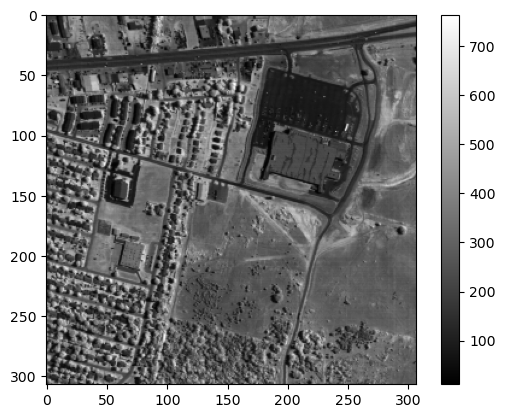

In [4]:
wavelength = 80
wavelength = 80
plt.imshow(X3d[wavelength, :, :], cmap='gray')
plt.colorbar()

### Small dataset

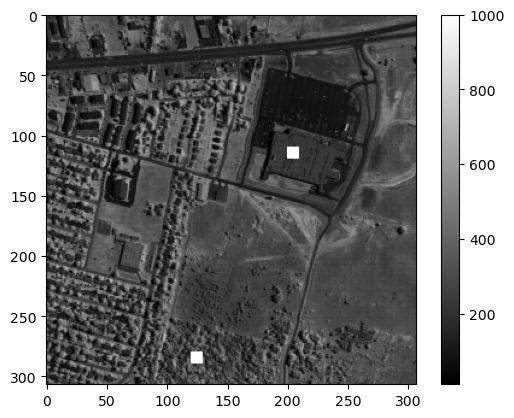

In [5]:
img = X3d[wavelength, :, :].copy()
img[280: 290, 120: 130] = 1000 # trees
img[110: 120, 200: 210] = 1000 # roof
plt.imshow(img, cmap='gray')
plt.colorbar()

In [6]:
smallX = np.load('urban/2022_11_17/small/X.npz')['X']

In [ ]:
save_filepath = 'urban/2022_11_17/small/r{}-l{}-it{}.npz'
rank = 6
reg = 10
iters = 200


data = np.load(save_filepath.format(rank, reg, iters))
Wb = data['Wb']
Hb = data['Hb']
Wl = data['Wl']
Hl = data['Hl']
fscores = data['fscores']
gscores = data['gscores']
lambda_vals = data['lambda_vals']

In [ ]:
plot_scores(fscores, gscores, lambda_vals)

In [ ]:
img_size = (20, 10)
fig, axs = plt.subplots(3, rank, figsize=(20, 10), sharey='row')

for idx in range(rank):
    axs[0, idx].plot(Wl[:, idx] / np.dot(Wl[:, idx], Wl[:, idx]))
    h_idx_3d = Hl[idx, :].reshape(img_size, order='F')
    axs[1, idx].plot(h_idx_3d)

    axs[2, idx].imshow(h_idx_3d)

    img = axs[2, idx].imshow(h_idx_3d, cmap='gray')
    divider = make_axes_locatable(axs[2, idx])
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(img, cax=cax, orientation='vertical')

In [ ]:
normalized_similarity(Wl)

### New smaller dataset

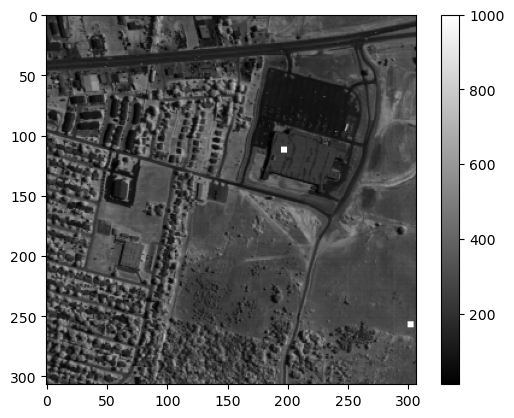

In [7]:
img = X3d[wavelength, :, :].copy()
img[255: 260, 300: 305] = 1000 # trees
img[110: 115, 195: 200] = 1000 # roof
plt.imshow(img, cmap='gray')
plt.colorbar()

In [8]:
smallX = np.load('urban/2022_11_17/smaller/X.npz')['X']

In [30]:
save_filepath = 'urban/2022_11_17/smaller/r{}-l{}-it{}.npz'
rank = 6
reg = 10
iters = 200

data = np.load(save_filepath.format(rank, reg, iters))
Wb = data['Wb']
Hb = data['Hb']
Wl = data['Wl']
Hl = data['Hl']
fscores = data['fscores']
gscores = data['gscores']
lambda_vals = data['lambda_vals']

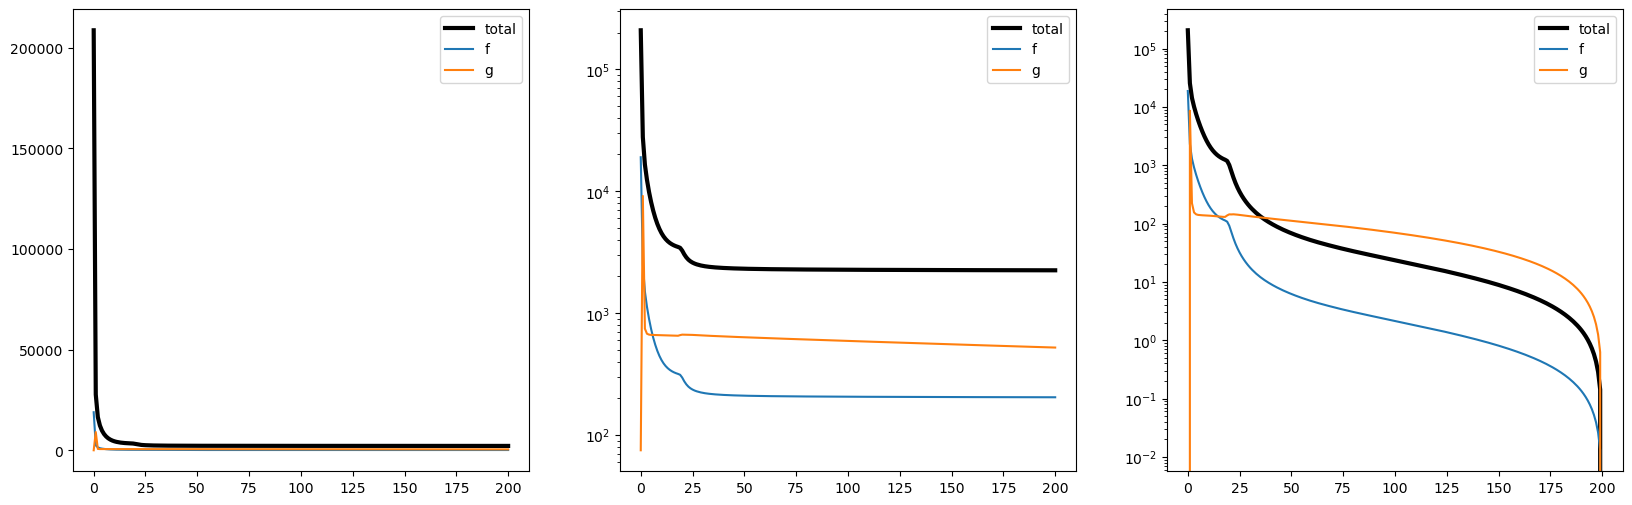

In [31]:
plot_scores(fscores, gscores, lambda_vals)

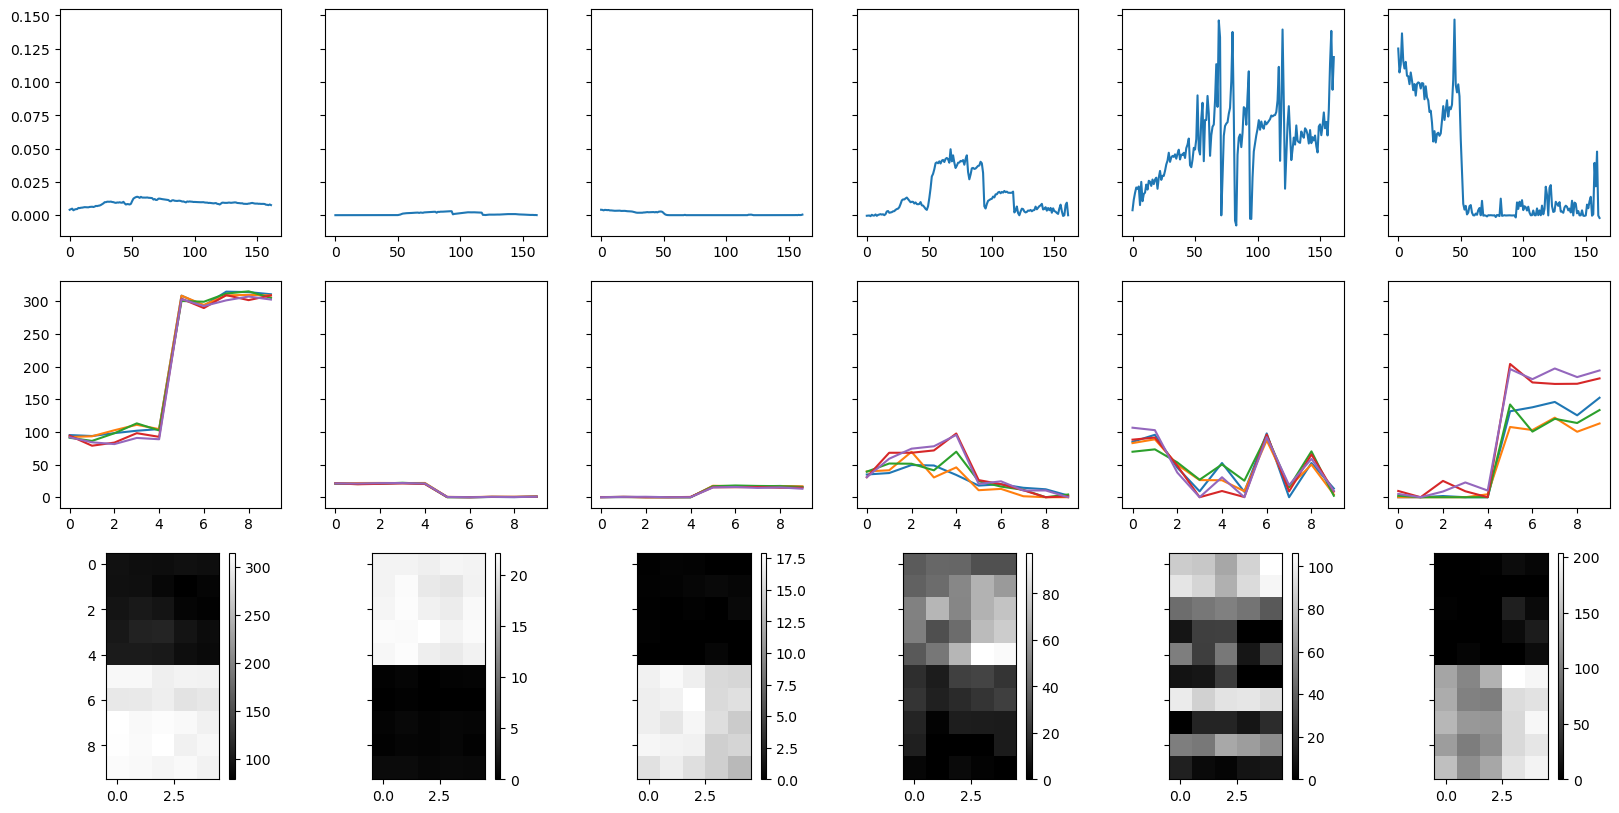

In [34]:
img_size = (10, 5)
fig, axs = plt.subplots(3, rank, figsize=(20, 10), sharey='row')

for idx in range(rank):
    axs[0, idx].plot(Wl[:, idx] / np.dot(Wl[:, idx], Wl[:, idx]))
    h_idx_3d = Hl[idx, :].reshape(img_size, order='F')
    axs[1, idx].plot(h_idx_3d)

    axs[2, idx].imshow(h_idx_3d)

    img = axs[2, idx].imshow(h_idx_3d, cmap='gray')
    divider = make_axes_locatable(axs[2, idx])
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(img, cax=cax, orientation='vertical')

In [33]:
normalized_similarity(Wl)

array([[0.   , 0.445, 0.385, 0.047, 0.059, 0.064],
       [0.175, 0.   , 0.253, 0.184, 0.192, 0.195],
       [0.172, 0.287, 0.   , 0.182, 0.182, 0.177],
       [0.048, 0.479, 0.416, 0.   , 0.025, 0.033],
       [0.06 , 0.493, 0.409, 0.025, 0.   , 0.013],
       [0.064, 0.495, 0.396, 0.032, 0.013, 0.   ]])

### Andersen's suggestion

In [37]:
mat_data = np.load('urban/2022_11_17/custom/X_gt.npz')
custom_X = mat_data['X']
W_true = mat_data['W']
H_true = mat_data['H']

In [38]:
save_filepath = 'urban/2022_11_17/custom/r{}-l{}-it{}.npz'
rank = 6
reg = 10
iters = 200

data = np.load(save_filepath.format(rank, reg, iters))
Wb = data['Wb']
Hb = data['Hb']
Wl = data['Wl']
Hl = data['Hl']
fscores = data['fscores']
gscores = data['gscores']
lambda_vals = data['lambda_vals']

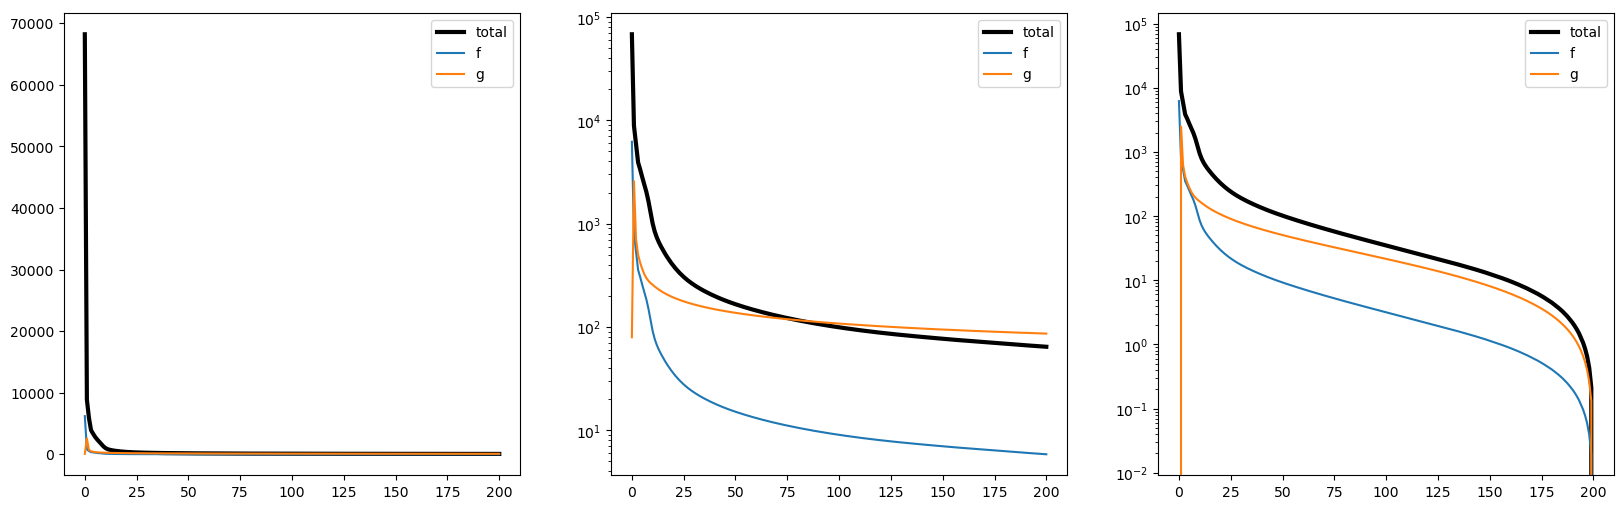

In [39]:
plot_scores(fscores, gscores, lambda_vals)

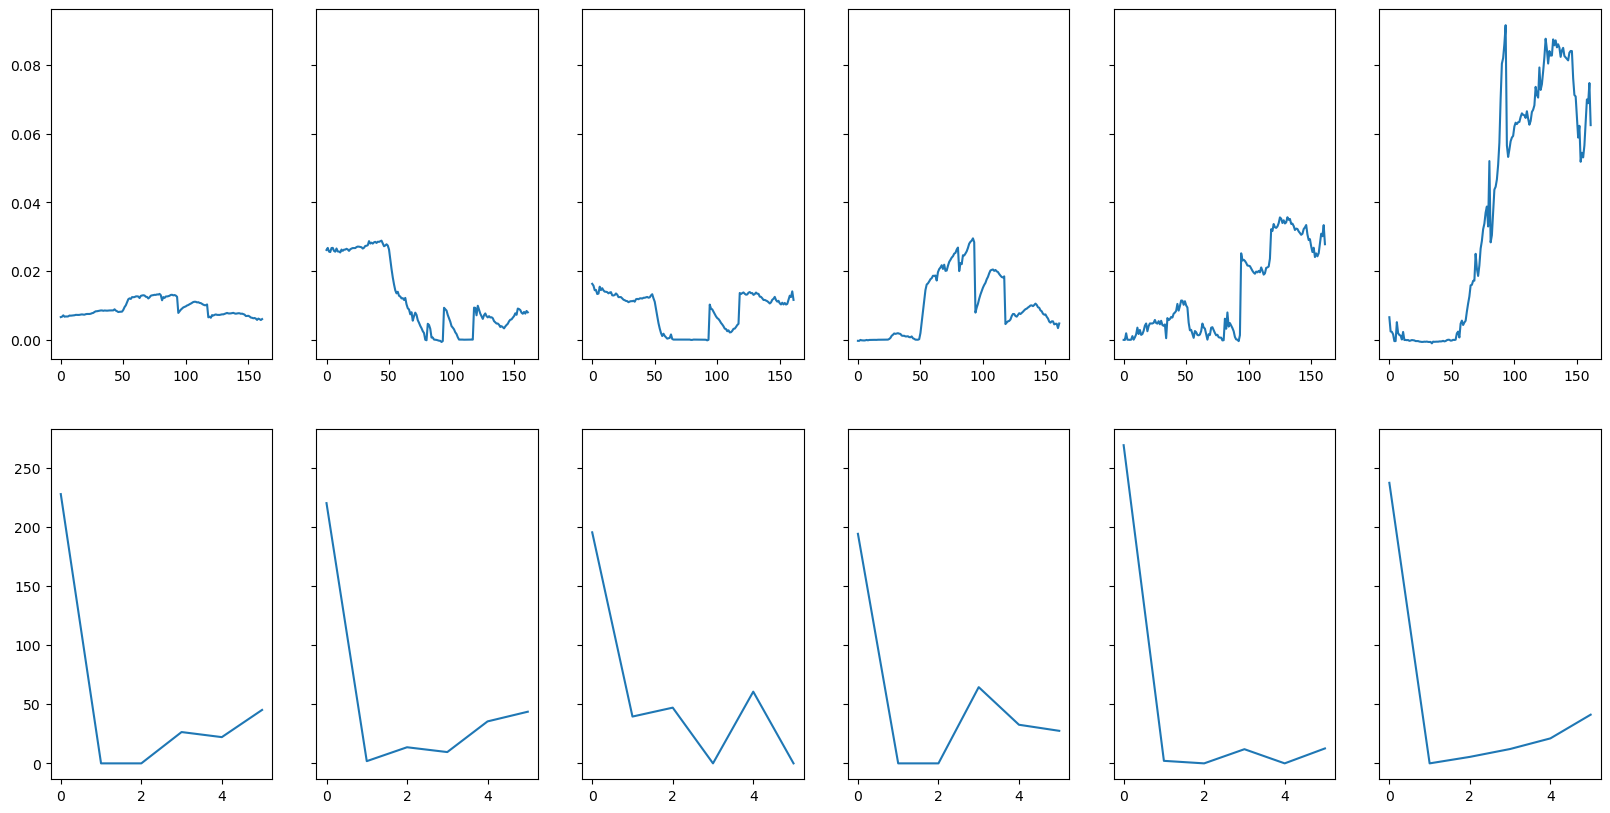

In [42]:
fig, axs = plt.subplots(2, rank, figsize=(20, 10), sharey='row')

for idx in range(rank):
    axs[0, idx].plot(Wl[:, idx] / np.dot(Wl[:, idx], Wl[:, idx]))
    axs[1, idx].plot(Hl[:, idx])

In [33]:
normalized_similarity(Wl)

array([[0.   , 0.445, 0.385, 0.047, 0.059, 0.064],
       [0.175, 0.   , 0.253, 0.184, 0.192, 0.195],
       [0.172, 0.287, 0.   , 0.182, 0.182, 0.177],
       [0.048, 0.479, 0.416, 0.   , 0.025, 0.033],
       [0.06 , 0.493, 0.409, 0.025, 0.   , 0.013],
       [0.064, 0.495, 0.396, 0.032, 0.013, 0.   ]])

### Full dataset

In [32]:
save_filepath = 'urban/2022_11_19/full/r{}-l{}-it{}.npz'
rank = 10
reg = 2
iters = 100

data = np.load(save_filepath.format(rank, reg, iters))
Wb = data['Wb']
Hb = data['Hb']
Wl = data['Wl']
Hl = data['Hl']
fscores = data['fscores']
gscores = data['gscores']
lambda_vals = data['lambda_vals']

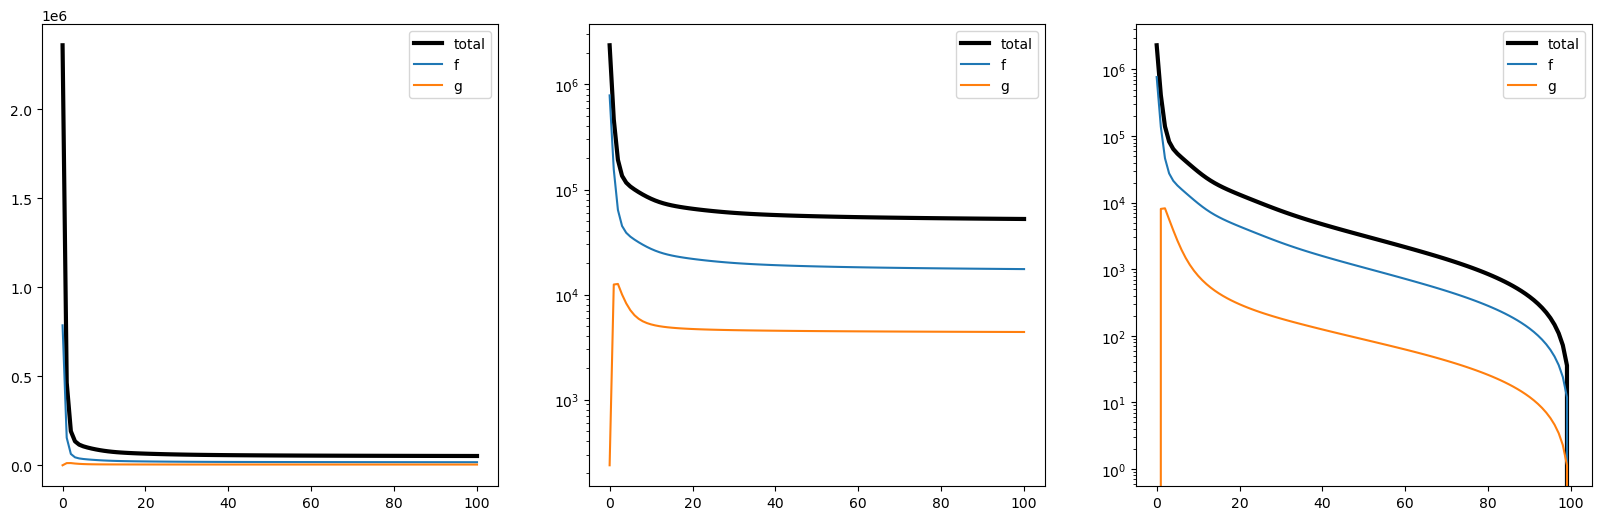

In [33]:
plot_scores(fscores, gscores, lambda_vals)

In [34]:
for row in normalized_similarity(Wl):
    print(row)

[0.    0.11  0.306 0.172 0.226 0.079 0.014 0.014 0.057 0.024]
[0.075 0.    0.218 0.132 0.175 0.075 0.078 0.076 0.088 0.084]
[0.118 0.123 0.    0.083 0.091 0.119 0.12  0.12  0.108 0.118]
[0.1   0.112 0.125 0.    0.162 0.108 0.101 0.102 0.088 0.103]
[0.106 0.119 0.11  0.131 0.    0.104 0.108 0.109 0.107 0.106]
[0.062 0.086 0.244 0.147 0.175 0.    0.067 0.066 0.081 0.072]
[0.013 0.11  0.301 0.169 0.224 0.083 0.    0.016 0.058 0.026]
[0.014 0.107 0.302 0.169 0.226 0.081 0.016 0.    0.059 0.027]
[0.05  0.113 0.247 0.133 0.202 0.091 0.053 0.054 0.    0.057]
[0.022 0.115 0.286 0.167 0.213 0.086 0.025 0.026 0.06  0.   ]


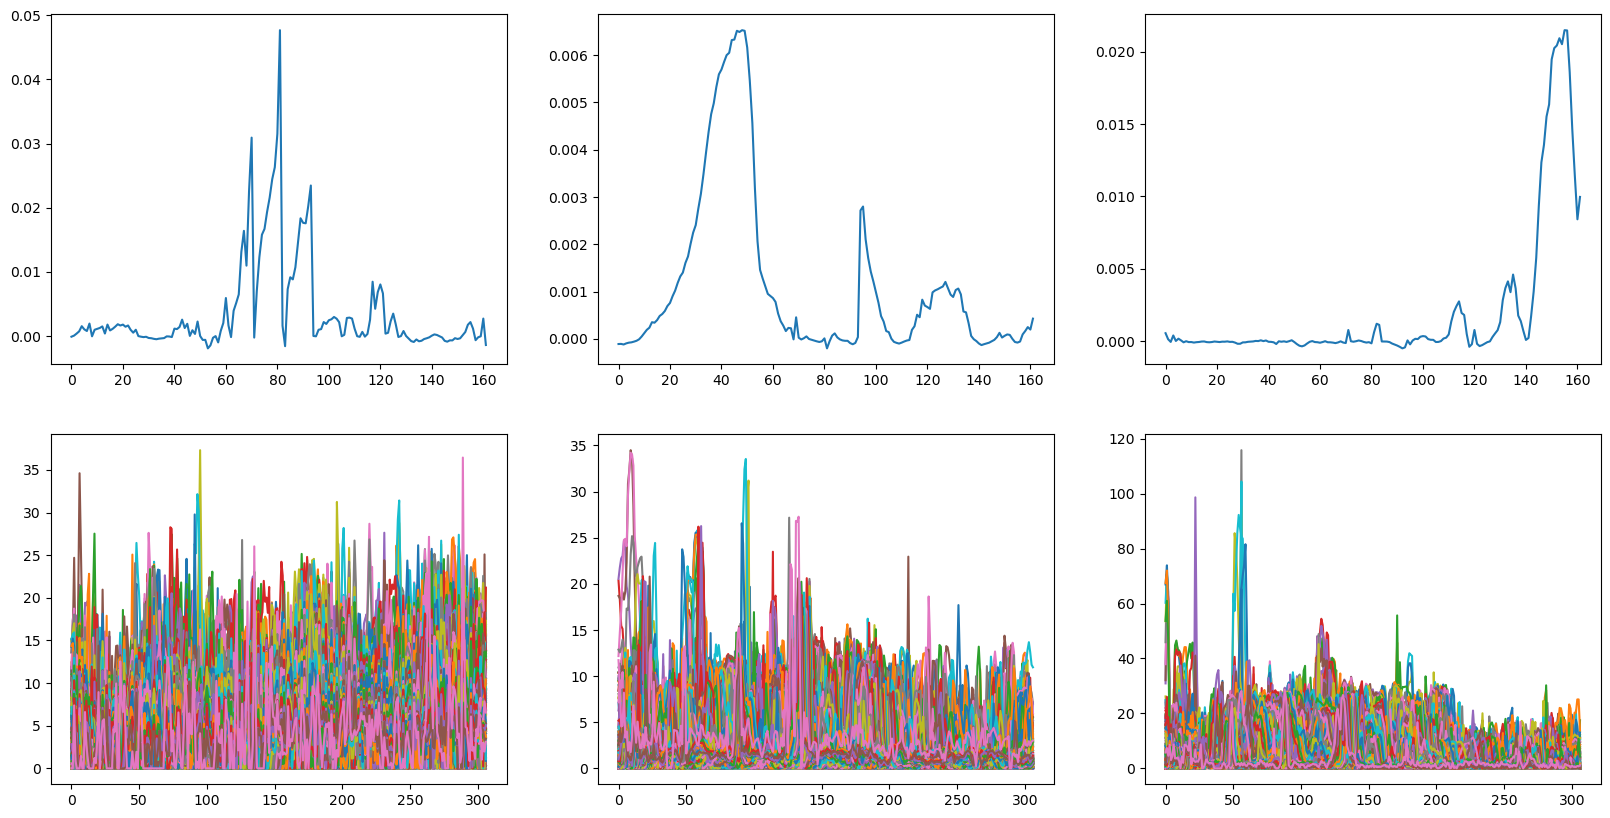

In [35]:
# plt_limit = 3
img_size = (307, 307)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, idx in enumerate([7, 8, 9]):
    w_vals = Wl[:, idx]
    w_vals /= np.dot(Wl[:, idx], Wl[:, idx])
    axs[0, i].plot(w_vals)
    h_idx_3d = Hl[idx, :].reshape(img_size, order='F')
    axs[1, i].plot(h_idx_3d)

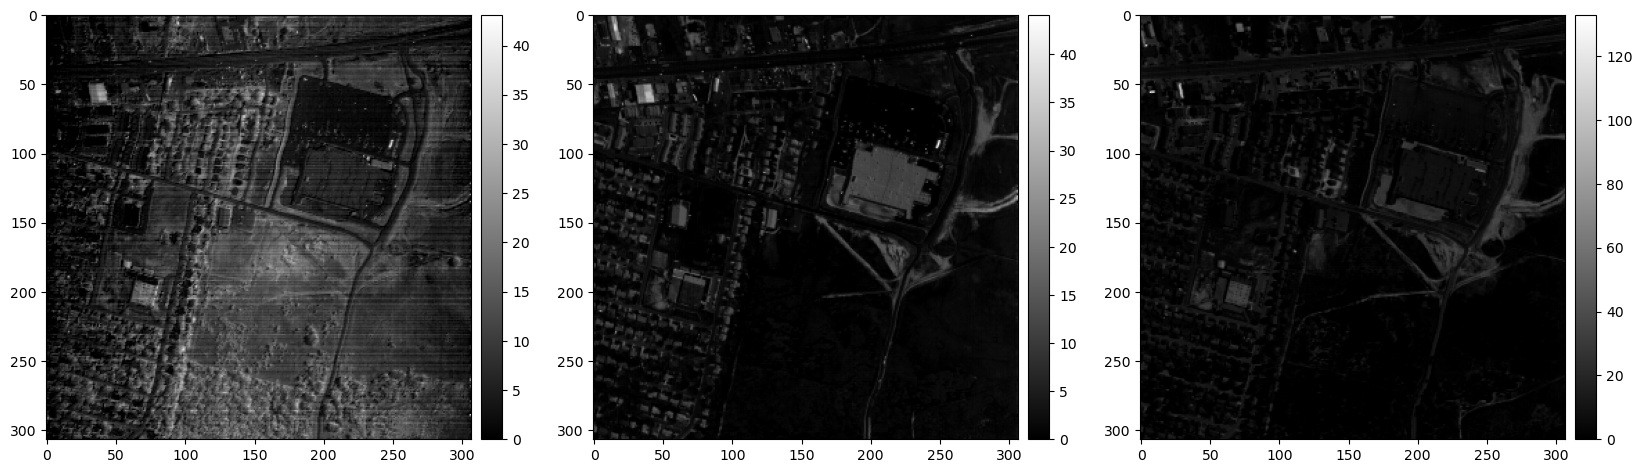

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

for i, idx in enumerate([7, 8, 9]):
    h_idx_3d = Hl[idx, :].reshape(img_size, order='F')

    axs[i].imshow(h_idx_3d)
    img = axs[i].imshow(h_idx_3d, cmap='gray')
    divider = make_axes_locatable(axs[i])

    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(img, cax=cax, orientation='vertical')